In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE

In [3]:
single_df = pd.read_csv("../../single_gaussian_output")
double_df = pd.read_csv("../../double_gaussian_output")
single_df["source"] = 0
double_df["source"] = 1

Mean diff -0.00707111342592732
Diff std 0.16692516830110338


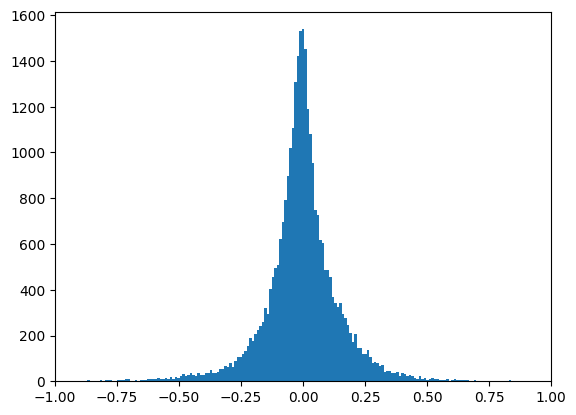

In [18]:
diff = single_df["Z_pred"] - double_df["Z_pred"]
print("Mean diff", diff.mean())
print("Diff std", diff.std())

plt.hist(diff, bins=np.linspace(-1,1,200))
plt.xlim(-1,1)
plt.show()

In [49]:
df = pd.concat([single_df, double_df])

magnitudes = ['MAG_GAAP_u','MAG_GAAP_g', 'MAG_GAAP_r','MAG_GAAP_i1', 'MAG_GAAP_i2',
          'MAG_GAAP_Z', 'MAG_GAAP_Y','MAG_GAAP_J', 'MAG_GAAP_H','MAG_GAAP_Ks']

colors = ['u-g', 'u-r', 'u-i1', 'u-i2', 'u-Z', 'u-Y','u-J', 'u-H', 'u-Ks', 'g-r', 'g-i1', 'g-i2',
          'g-Z', 'g-Y', 'g-J', 'g-H','g-Ks', 'r-i1', 'r-i2', 'r-Z', 'r-Y', 'r-J', 'r-H', 'r-Ks', 
          'i1-i2','i1-Z', 'i1-Y', 'i1-J', 'i1-H', 'i1-Ks', 'i2-Z', 'i2-Y', 'i2-J', 'i2-H','i2-Ks', 
          'Z-Y', 'Z-J', 'Z-H', 'Z-Ks', 'Y-J', 'Y-H', 'Y-Ks', 'J-H','J-Ks', 'H-Ks']

df = df[magnitudes + colors + ["Z_pred", "Z_pred_std","source"]]
df.head()

,MAG_GAAP_u,MAG_GAAP_g,MAG_GAAP_r,MAG_GAAP_i1,MAG_GAAP_i2,MAG_GAAP_Z,MAG_GAAP_Y,MAG_GAAP_J,MAG_GAAP_H,MAG_GAAP_Ks,...,Z-Ks,Y-J,Y-H,Y-Ks,J-H,J-Ks,H-Ks,Z_pred,Z_pred_std,source
0,20.577538,20.214476,19.931406,19.828590,19.593224,20.128235,20.222680,19.891861,19.551235,19.614262,...,0.513973,0.330818,0.671444,0.608418,0.340626,0.277599,-0.063026,1.528906,0.064250,0
1,22.671648,22.551811,21.854704,22.161276,22.084670,22.517708,22.339226,21.567667,21.346348,21.348335,...,1.169373,0.771559,0.992878,0.990891,0.221319,0.219332,-0.001987,1.447436,0.312732,0
2,23.809850,23.929075,24.829887,23.315115,23.205559,23.610514,23.938856,23.040890,23.403660,21.977215,...,1.633299,0.897966,0.535196,1.961641,-0.362770,1.063675,1.426445,1.993650,0.082612,0
3,24.106500,23.758213,23.779669,23.541826,23.714209,24.027212,23.634611,23.266266,23.309820,24.175718,...,-0.148506,0.368345,0.324791,-0.541107,-0.043554,-0.909452,-0.865898,2.372115,0.342254,0
4,22.995787,22.801292,22.906603,23.708847,22.900976,22.463282,22.331263,21.459120,21.148544,20.977602,...,1.485680,0.872143,1.182718,1.353661,0.310576,0.481518,0.170942,1.645581,0.313720,0


In [51]:
tsne = TSNE(n_components=2, verbose=1)
tsne_results = tsne.fit_transform(df)

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 60088 samples in 0.005s...
[t-SNE] Computed neighbors for 60088 samples in 0.725s...
[t-SNE] Computed conditional probabilities for sample 1000 / 60088
[t-SNE] Computed conditional probabilities for sample 2000 / 60088
[t-SNE] Computed conditional probabilities for sample 3000 / 60088
[t-SNE] Computed conditional probabilities for sample 4000 / 60088
[t-SNE] Computed conditional probabilities for sample 5000 / 60088
[t-SNE] Computed conditional probabilities for sample 6000 / 60088
[t-SNE] Computed conditional probabilities for sample 7000 / 60088
[t-SNE] Computed conditional probabilities for sample 8000 / 60088
[t-SNE] Computed conditional probabilities for sample 9000 / 60088
[t-SNE] Computed conditional probabilities for sample 10000 / 60088
[t-SNE] Computed conditional probabilities for sample 11000 / 60088
[t-SNE] Computed conditional probabilities for sample 12000 / 60088
[t-SNE] Computed conditional probabilities for sam

<Axes: xlabel='tsne-2d-one', ylabel='tsne-2d-two'>

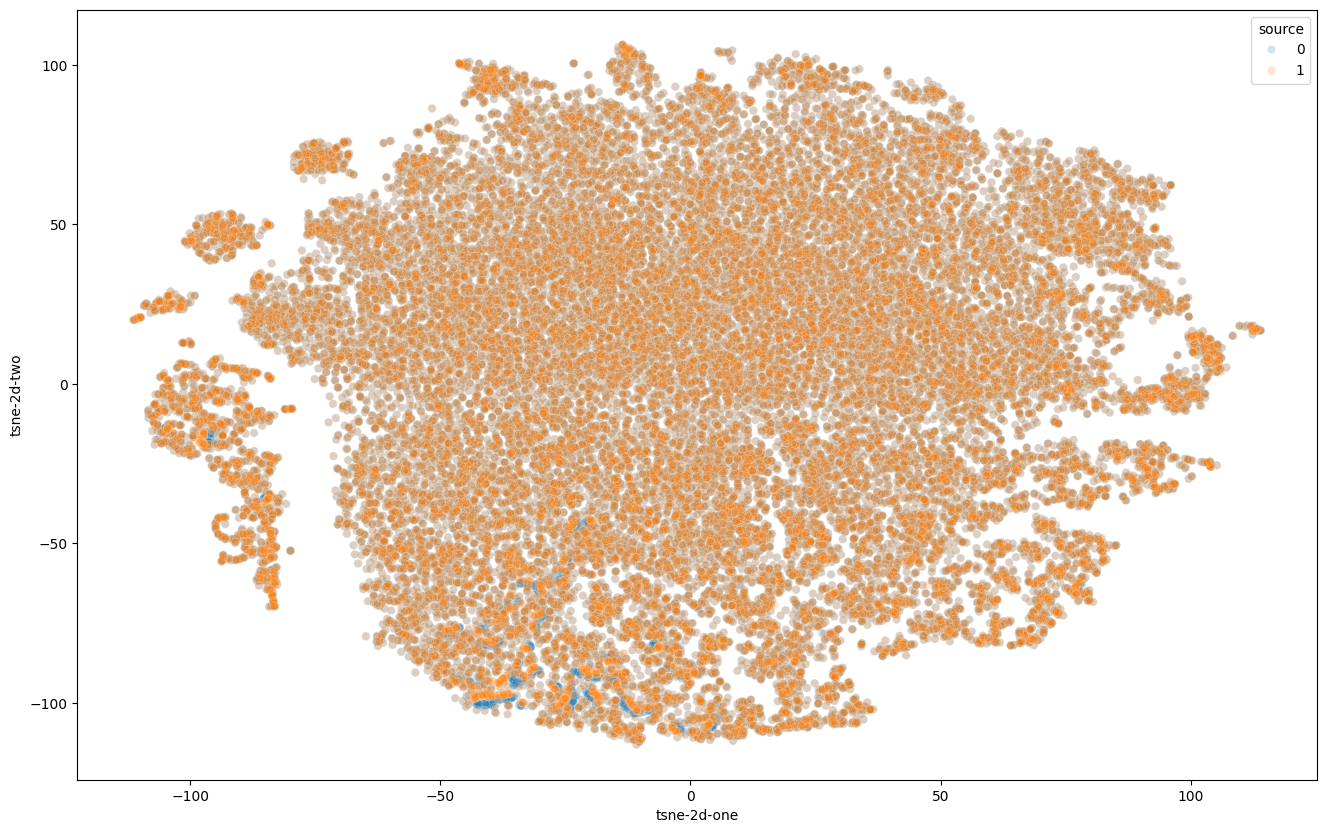

In [61]:
df['tsne-2d-one'] = tsne_results[:,0]
df['tsne-2d-two'] = tsne_results[:,1]

plt.figure(figsize=(16,10))
sns.scatterplot(
    x="tsne-2d-one", y="tsne-2d-two",
    hue="source",
    data=df,
    legend="full",
    alpha=0.2
)